## Homework 02

### Exercise 1
One half percent of the population has a coronavirus and a test is being developed. This test gives a false positive $3\%$ of the time and a false negative $2\%$ of the time. 

1. Find the probability that Luca is positive to the test.
2. Suppose Luca is positive to the test. What is the probability that he has contracted the disease?

#### Solution
Let's define the events.
* $L = $ "Luca has the coronavirus"; $p(L) = 0.005$
* $L^c = $ "Luca has NOT the coronavirus"; $p(L^c) = 0.995$
* $T = $ "Luca resulted positive to the test";
* $T^c = $ "Luca resulted negative to the test";
<br><br>
Now we know that $p(T|L^c) = 0.03$ and $p(T^c|L) = 0.02$ and thus $p(T|L) = 0.97$ and $p(T^c|L^c) = 0.98$.<br>
Due to the law of total probability we can compute the following<br><br>
$$
p(T) = p(T|L)\;p(L) \: + \: p(T|L^c)\;p(L^c) = 0.97*0.005 \; + \; 0.03*0.995 = 0.0347
$$

Then $p(L|T)$ can be computed thanks to the *Bayes Theorem* in the following way<br><br>
$$
p(L|T) = \frac{p(T|L)\;p(L)}{p(T)} = \frac{0.97 * 0.005}{0.0347} =0.1397
$$
<br><br>
This example shows that a classifier effectiveness is not always determined by its accuracy, but also FPR and FNR should be taken into account.

### Exercise 2

Implement the empirical cumulative distribution function $F_X(x)=$ `cdf(dist, x)` taking as inputs a `pyro.distributions` object `dist`, corresponding to the distribution of $X$, and a real value `x`.

Suppose that $X\sim \mathcal{N}(0,1)$ and plot $F_X(x)$.

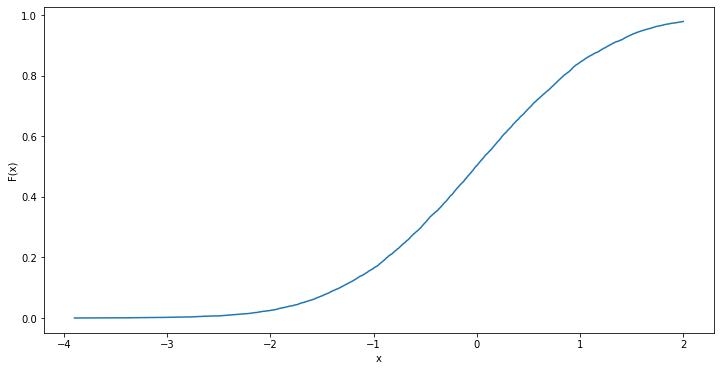

In [10]:
import pyro
import pyro.distributions as distr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    
def cdf_axises(dist : pyro.distributions, x):
    """
    Function that computes all the values of F up to F(x)
    Returns the axis needed for plotting
    """
    sample = np.sort([pyro.sample('s', dist) for i in range(10000)])
    x_axis = list(filter(lambda a: a<x, sample))
    temp = np.arange(1,len(sample)+1) / len(sample)
    y_axis = [temp[i] for i in range(len(x_axis))]
    return (x_axis, y_axis)
    
def cdf(dist: pyro.distributions, x):
    return cdf_axises(dist, x)[1][-1]

axises = cdf_axises(distr.Normal(0,1), 2)
plt.figure(figsize=(12,6))
plt.xlabel("x")
plt.ylabel("F(x)")
plt.plot(axises[0], axises[1])

### Exercise 3

Suppose the heights of male students are normally distributed with mean $180$ and unknown variance $\sigma^2$. Suppose that $\sigma^2$ is in the range $[22,41]$ with approximately $95\%$ probability and assign to $\sigma^2$ an inverse-gamma $IG(38,1110)$ prior distribution .

1. Empirically verify that the parameters of the inverse-gamma distribution lead to a prior probability of approximately $95\%$ that  $\sigma^2\in[22,41]$.
2. Derive the posterior density of $\sigma^2$ corresponding to the following data: $183, 173, 181, 170, 176, 180, 187, 176, 171, 190, 184, 173, 176, 179, 181, 186$.
Then plot it together with the prior density.
3. Compute the posterior density of the standard deviation $\sigma$.

#### SOLUTION
1. This means that $F_X(41)-F_X(22) \approx 0.95$

In [11]:
import pyro
import pyro.distributions as distr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

variance = distr.InverseGamma(38,1110)
print(cdf(variance, 41)-cdf(variance, 22))

0.9435


2. We by the bayes theorem that the posterior is proportion to the likelihood times the prior, namely:
$$
p(\sigma^2|X) \propto p(X|\sigma^2)\;p(\sigma)
$$
We have therefore, with $X \sim N(180,\sigma^2)$ and $\sigma^2 \sim IG(30, 1110)$
$$
\bigg(\prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}}exp\Big( -\frac{( x-\mu )^2}{2\sigma^2} \Big) \bigg)\: \frac{\beta^\alpha}{\Gamma(\alpha)}\;\frac{exp\big( -\frac{\beta}{\sigma^2} \big)}{(\sigma^2)^{\alpha-1}} = \bigg( (2\pi\sigma^2)^{-n/2}exp\bigg(-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2\bigg) \bigg)\:\frac{\beta^\alpha}{\Gamma(\alpha)} \: \frac{exp\big( -\frac{\beta}{\sigma^2} \big)}{(\sigma^2)^{\alpha-1}} 
$$
As this a function of $\sigma^2$ we can get rid of all constants that does not depend on.
$$
\bigg( \bigg(\frac{1}{\sigma^2}\bigg)^{\frac{n}{2}}exp\bigg(-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2\bigg) \bigg)
\: \frac{exp\big( -\frac{\beta}{\sigma^2} \big)}{(\sigma^2)^{\alpha-1}} = \bigg(\frac{1}{(\sigma^2)^{\alpha+n/2-1}}\bigg) exp \bigg(-\frac{1}{\sigma^2} \bigg( \beta + \frac{1}{2}\sum_{i=1}^n(x_i+\mu)^2 \bigg) \bigg)
$$
<br>
It is possible to observe that $p(\sigma^2|X)$ has distribution $IG(38+n/2, 1110 + \frac{1}{2}\sum_{i=1}^n(x_i-\mu)^2) = IG(46,1380)$

In [29]:
mu = 180
y = np.array([183,173,181,170,176,180,187,176,171,190,184,173,176,179,181,186])
mean = y.mean()
n = len(y)
alpha = 38 + n/2
beta = 1110 + 1/2*sum( map( lambda x: ( x-mu )**2, y ) )
print( "Beta: " + str( beta ) )
print( "Alpha: " + str(alpha) )

Beta: 1380.0
Alpha: 46.0


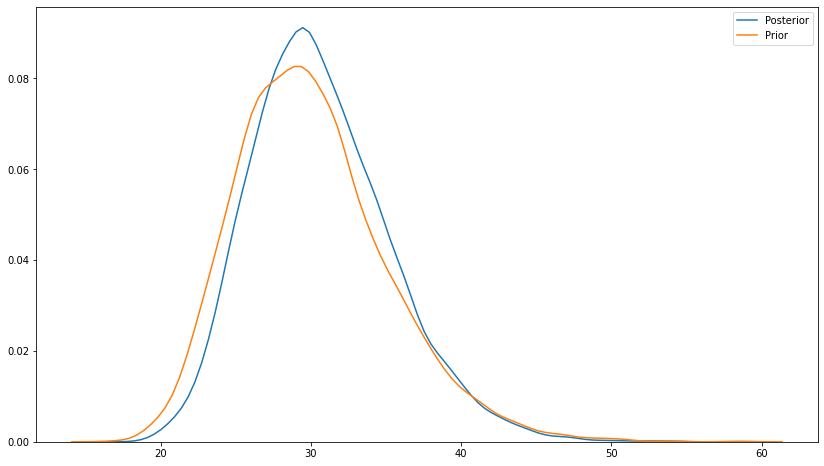

In [35]:
##plot prior and posterior

prior_sample = [pyro.sample( "s_prior", distr.InverseGamma( 38, 1110 ) ) for _ in range(10000)]
posterior_sample = [pyro.sample( "s_posterior", distr.InverseGamma( 46, 1380 ) ) for _ in range(10000)]

plt.figure(figsize=(14,8))
sns.distplot(posterior_sample,hist=False,label="Posterior")
sns.distplot(prior_sample,hist=False,label="Prior")

3. 

### Exercise 4

Prove that the Gamma distribution is the conjugate prior distribution for the Exponential likelihood.

#### SOLUTION
Let $X \sim Exp(\lambda)$ and $\lambda \sim Gamma(\alpha, \beta)$. Therefore we have that $p(\lambda|X) \propto p(X|\lambda)p(\lambda)$. It follows<br><br>
$$
p(X|\lambda)p(\lambda) = \bigg( \prod_{i=1}^n \lambda e^{-\lambda x_i} \bigg)\; \frac{\beta^\alpha \lambda^{\alpha-1}e^{-\beta\lambda}}{\Gamma(\alpha)}
$$
<br>
We simplify the product and get rid of all constants that does not depend on $\lambda$<br><br>
$$
\lambda^n e^{-\lambda\bar{x}n} \lambda^{\alpha-1}e^{-\beta\alpha}
$$
<br>
where $\bar{x}$ is the sample mean. After some more simplifications we obtain
<br><br>
$$
\lambda^{\alpha+n-1}e^{-\lambda( \beta+n\bar{x} )} \sim Gamma(\alpha + n, \beta + n\bar{x})
$$

q.e.d.